In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
# Make a copy the original data
data_ori = data.copy()

# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [4]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

temp1 = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean'])
temp1.rename(columns = {
    'min':'min_salary',
    'median': 'median_salary',
    'max': 'max_salary',
    'mean': 'average_salary'
                       }, inplace = True)
temp1

# references
# 1: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# 2: https://www.tutorialspoint.com/how-to-combine-groupby-and-multiple-aggregate-functions-in-pandas

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

In [5]:
# other answer
temp1b = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(min_salary = 'min',
                                                            median_salary = 'median',
                                                            max_salary = 'max',
                                                            average_salary = 'mean')
temp1b

# references:
# 1: https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [6]:
#code here
temp2 = data.groupby('TermReason')['EmploymentStatus']
temp2 = temp2.agg(total_termination = 'count')
temp2 = temp2.sort_values(by = 'total_termination',
                          ascending = False)
pd.DataFrame(temp2)
temp2.head()

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [7]:
#code here
temp3 = data[data['PerformanceScore'] == 'Exceeds']
temp3 = temp3.groupby('RecruitmentSource')['PerformanceScore'].agg(total_recruit = 'count')
temp3 = temp3.sort_values(by = 'total_recruit',
                          ascending = False)
temp3

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [8]:
#code here
temp4 = data.groupby('Department')['ManagerName'].agg(ManagerName = 'nunique')
temp4

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [9]:
#code here
temp5 = data.groupby('Sex')['Termd'].value_counts(normalize = True)
temp5

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

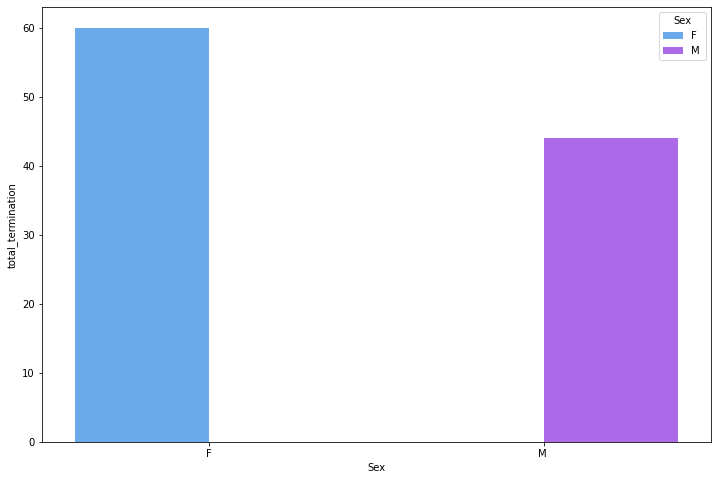

In [10]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

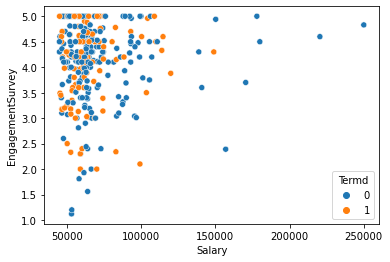

In [11]:
#code here
sns.scatterplot(data = data,
                x = 'Salary',
                y = 'EngagementSurvey',
                hue = 'Termd')
plt.show()

# references
# 1: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

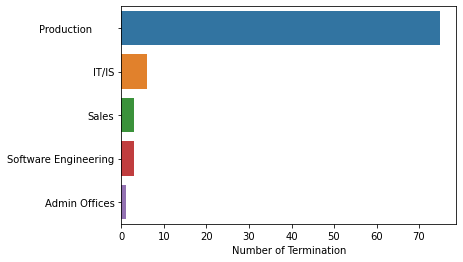

In [12]:
# code here
# filter the data
temp7 = data[data['Termd'] == 1]
temp7 = temp7[temp7['EmploymentStatus'] == 'Voluntarily Terminated']

# show the plot
sns.barplot(x = temp7['Department'].value_counts().sort_values(ascending = False),
            y = temp7['Department'].value_counts().sort_values(ascending = False).keys(),
            orient = 'h')
plt.xlabel('Number of Termination')
plt.show()

# References
# 1: https://seaborn.pydata.org/generated/seaborn.barplot.html

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

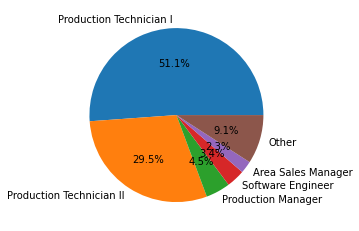

In [13]:
# code here
# use temp7 for the filtered data
position = temp7['Position'].value_counts().sort_values(ascending = False).keys()
count = np.array(temp7['Position'].value_counts())

# show top 5 position to be plotted and change the rest to 'others'
position = list(position[:5])
position.append('Other')
temp8 = count[5:].sum()
count = list(count[:5])
count.append(temp8)

# plot the data
plt.pie(count,
        labels = position,
        autopct='%1.1f%%')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

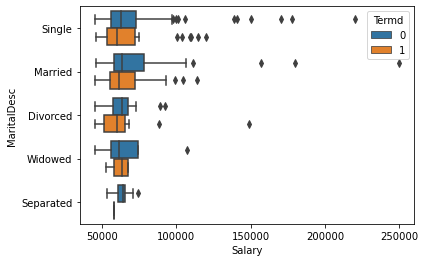

In [14]:
# code here
sns.boxplot(data = data,
            x = 'Salary',
            y = 'MaritalDesc',
            hue = 'Termd')
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

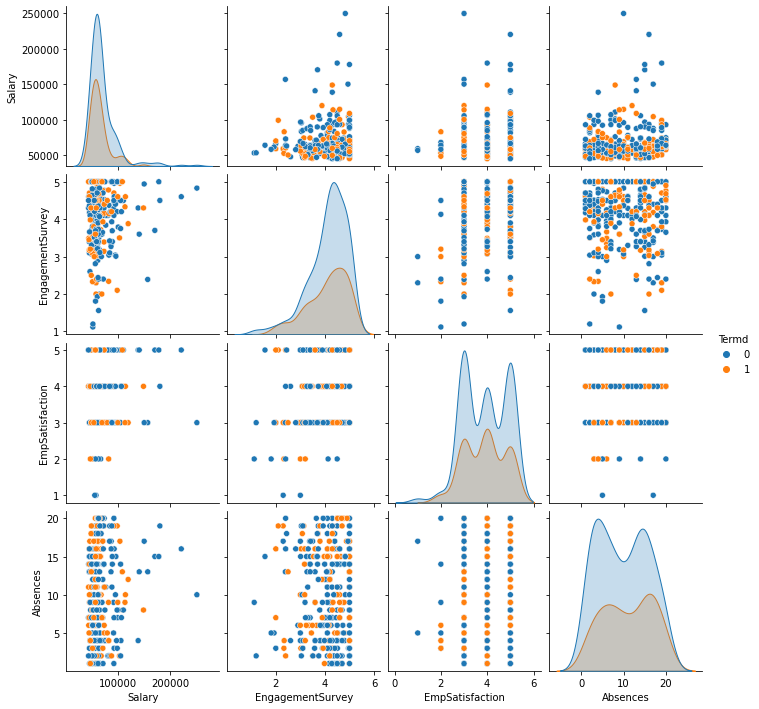

In [15]:
# code here
sns.pairplot(data = data[['Salary',
                          'EngagementSurvey',
                          'EmpSatisfaction',
                          'Absences',
                          'Termd']],
             hue = 'Termd')
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [16]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
# code here
temp11 = data['DOB'].copy()
temp11 = pd.DataFrame(temp11)
temp11['DOB_date'] = pd.to_datetime(temp11['DOB'])
temp11['Age'] = 2022 - temp11['DOB_date'].dt.year
temp11

# references
# 1: https://sparkbyexamples.com/pandas/pandas-convert-datetime-to-string-format/
# 2: https://sparkbyexamples.com/pandas/pandas-extract-year-from-datetime/

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [17]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
# code here
from sklearn.preprocessing import MinMaxScaler

temp12 = data['Salary'].copy()
temp12 = pd.DataFrame(temp12)
scaler = MinMaxScaler()
temp12_minmax = scaler.fit_transform(temp12)
temp12['Salary_minmax'] = temp12_minmax

temp12

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [18]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
# code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [19]:
#Setelah diubah category
# code here
for i in data.columns:
    if data[i].dtype == object:
        data[i] = data[i].astype('category')
data.info()

# references:
# 1: https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas
# 2: https://stackoverflow.com/questions/28910851/python-pandas-changing-some-column-types-to-categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Employee_Name               311 non-null    category
 1   EmpID                       311 non-null    int64   
 2   MarriedID                   311 non-null    int64   
 3   MaritalStatusID             311 non-null    int64   
 4   GenderID                    311 non-null    int64   
 5   EmpStatusID                 311 non-null    int64   
 6   DeptID                      311 non-null    int64   
 7   PerfScoreID                 311 non-null    int64   
 8   FromDiversityJobFairID      311 non-null    int64   
 9   Salary                      311 non-null    int64   
 10  Termd                       311 non-null    int64   
 11  PositionID                  311 non-null    int64   
 12  Position                    311 non-null    category
 13  State               

In [20]:
#14. Ubahlah "RecruitmentSource" dengan menggunakan Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakan Label Encoder
# 5 point
# code here
from sklearn.preprocessing import LabelEncoder
laben1 = LabelEncoder()
laben2 = LabelEncoder()

In [21]:
# code here
laben1_class = data['RecruitmentSource'].value_counts().sort_values(ascending = False).keys()
laben2_class = data['PerformanceScore'].value_counts().sort_values(ascending = False).keys()

data['RecruitmentSource'] = laben1.fit_transform(data['RecruitmentSource'])
data['PerformanceScore'] = laben2.fit_transform(data['PerformanceScore'])
data[['RecruitmentSource', 'PerformanceScore']].head()

# references
# 1: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# 2: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

,RecruitmentSource,PerformanceScore
0,5,0
1,4,1
2,5,1
3,4,1
4,3,1


In [22]:
#16. Pisahkan dependent variable dan independent variable
# 5 point
# code here
data['Age'] = 2022 - temp11['DOB_date'].dt.year
data['Salary_minmax'] = temp12_minmax

#Dependent Varible (target)
x = data[[
    'MarriedID', 'MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID',
    'PositionID', 'Age', 'RecruitmentSource', 'PerformanceScore', 'Salary_minmax',
    'Absences', 'SpecialProjectsCount', 'EmpSatisfaction', 'EngagementSurvey'
]]

#Independent Variable (feature)
y = data['Termd']

In [23]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_recall_curve,
                             roc_curve, precision_score, recall_score)

# do the train-test split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    # put some stratify technique
                                                    stratify = y
                                                    )

In [24]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
# code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
# define the variables for the classifier
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier(max_depth = 8)
gbc = GradientBoostingClassifier(max_depth = 8, n_estimators = 10)
classifier = (knn, dt, gbc)
classifier_name = ('K-Nearest Neighbor', 'Decision Tree', 'Gradient Boosting')
pred = []
acc = []
prec = []
rec = []

# train the model and save the result
for i in classifier:
    i.fit(x_train, y_train)
    pred.append(i.predict(x_test))
    
    acc.append(accuracy_score(y_test, pred[-1]))
    prec.append(precision_score(y_test, pred[-1]))
    rec.append(recall_score(y_test, pred[-1]))

In [26]:
# print the result
for i in range(len(classifier)):
    print(f'{i+1}. {classifier_name[i]} model ')
    print('Accuracy:\t', f'{round((acc[i] * 100), 2)}%')
    print('Precision:\t', f'{round((prec[i] * 100), 2)}%')
    print('Recall:\t\t', f'{round((rec[i] * 100), 2)}%')
    print('-------------------------')

1. K-Nearest Neighbor model 
Accuracy:	 55.56%
Precision:	 26.67%
Recall:		 19.05%
-------------------------
2. Decision Tree model 
Accuracy:	 55.56%
Precision:	 33.33%
Recall:		 33.33%
-------------------------
3. Gradient Boosting model 
Accuracy:	 61.9%
Precision:	 36.36%
Recall:		 19.05%
-------------------------


It can be concluded that the Gradient Boosting model is the best to predict the termination employee because it has a better accuracy and precision rate than the other two.

# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

In [27]:
# code here, for question 19
temp19 = data_ori[data_ori['PerformanceScore'] != 'PIP']
temp19 = temp19[temp19['PerformanceScore'] != 'Needs Improvement']
temp19b = temp19.groupby(['ManagerName',
                          'PerformanceScore'])['Employee_Name'].agg(
    total = 'count').sort_values(by = 'total',
                                 ascending = False)
# temp19b

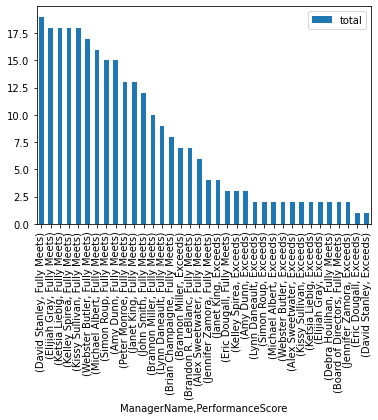

In [28]:
temp19b.plot(kind = 'bar')
plt.show()

Insights?

Implicitly, the visualization above shows that some managers can influence employee performance.

C:\Users\AreIsAndI\AppData\Local\Temp\ipykernel_12336\2863400799.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data_ori['RecruitmentSource'].value_counts().index,


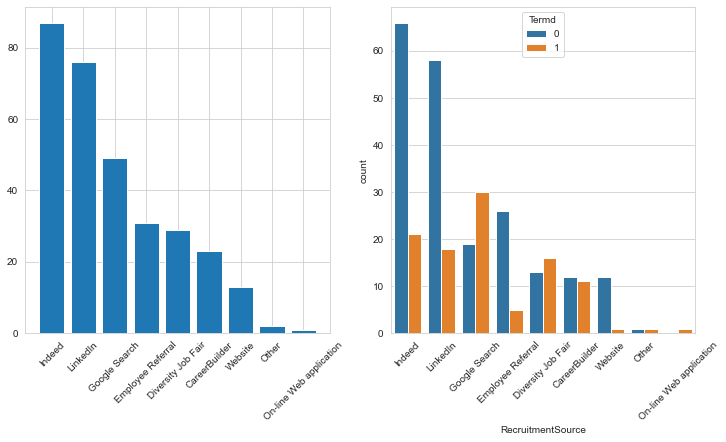

In [29]:
# code here, for question 20
# initialize the canvar
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

# first approach
recSour = data_ori['RecruitmentSource'].value_counts()
axs[0].bar(data_ori['RecruitmentSource'].unique(), height = recSour)

# second approach
# sns.barplot(ax = axs[0],
#             x = data_ori['RecruitmentSource'].unique(),
#             y = data_ori['RecruitmentSource'].value_counts())

# plot by hue
sns.countplot(ax = axs[1],
              data = data_ori,
              x = 'RecruitmentSource',
              hue = 'Termd',
              order = data_ori['RecruitmentSource'].value_counts().index)

axs[0].set_xticklabels(data_ori['RecruitmentSource'].value_counts().index,
                       rotation=45)
axs[1].set_xticklabels(data_ori['RecruitmentSource'].value_counts().index,
                       rotation=45)
plt.show()

Insights?

Google search give a higher rate of employee termination.

In [30]:
# calculate wether the employee is terminated or not
recruit = np.array(data_ori['RecruitmentSource'].value_counts().sort_values(ascending = False).keys())
totalRecruit = np.array(data_ori['RecruitmentSource'].value_counts())
isNotTerm = []
isTerm = []

for i in range(len(recruit)):
    for j in range(2):
        temp20 = data_ori[data_ori['RecruitmentSource'] == recruit[i]][['RecruitmentSource', 'Termd']]
        temp20 = temp20[temp20['Termd'] == j]
        
        if j == 0:
            isNotTerm.append(temp20.count()[0])
        elif j == 1:
            isTerm.append(temp20.count()[0])

In [31]:
# calculate the termination rate
# the formula will be: number of termination / total recruitment by sources
termRate = []

for i in range(len(recruit)):
    temp20b = isTerm[i] / totalRecruit[i]
    temp20b *= 100
    termRate.append(round(temp20b, 2))

In [32]:
dfTermRate = pd.DataFrame({'RecruitmentSource': recruit,
                           'TermRate (in %)': termRate})
dfTermRate.sort_values(by = 'TermRate (in %)')

,RecruitmentSource,TermRate (in %)
6,Website,7.69
3,Employee Referral,16.13
1,LinkedIn,23.68
0,Indeed,24.14
5,CareerBuilder,47.83
7,Other,50.00
4,Diversity Job Fair,55.17
2,Google Search,61.22
8,On-line Web application,100.00


Insights?

Website is a recruitment source with the lowest termination of rate.